In [1]:
import nidaqmx
from nidaqmx.constants import AcquisitionType
from nidaqmx.stream_readers import AnalogMultiChannelReader
import numpy as np
from matplotlib.pyplot import *
import time

In [2]:
task = nidaqmx.Task()
#device = "Dev1"
device = 'OTKB'
task.ai_channels.add_ai_voltage_chan(device + "/ai0")
task.ai_channels.add_ai_voltage_chan(device + "/ai1")
task.ai_channels.add_ai_voltage_chan(device + "/ai2")
sample_rate = 1000
n_points=2000

task.timing.cfg_samp_clk_timing(rate=sample_rate,
                                sample_mode=AcquisitionType.CONTINUOUS,
                                samps_per_chan=n_points)

In [3]:
task.start()

In [4]:
reader = AnalogMultiChannelReader(task.in_stream)

<IPython.core.display.Javascript object>


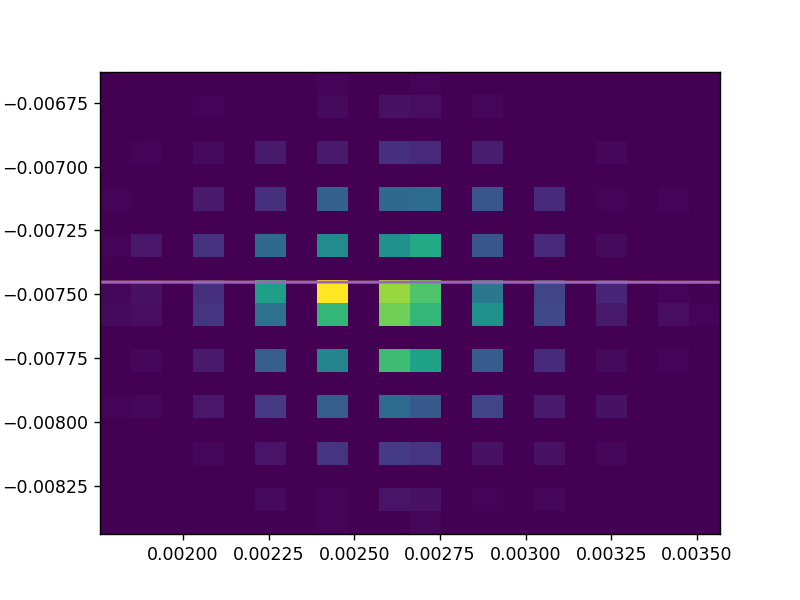

[0.00225128 0.00241575 0.00274468 ... 0.00258021 0.00258021 0.00241575] [-0.00745225 -0.00761671 -0.00728778 ... -0.00761671 -0.00712331
 -0.00745225]


In [5]:
subplots()
h = hist2d([],[],bins=20)

i=0
#while i < 20:
print(i,end='\r')
data_out = np.empty(shape=(3, n_points))
reader.read_many_sample(data = data_out,
                       number_of_samples_per_channel=n_points, timeout = 200)

x = data_out[0,:]
y = data_out[1,:]
print(x,y)
h = hist2d(x,y,bins=20)
draw()
time.sleep(1)

i+=1

In [7]:
import numpy as np
import matplotlib.pyplot as plt



plt.plot(data_out[0,:],label='x')
plt.plot(data_out[1,:],label='y')
pltplot(data_out[2,:],label='z')

show()

# Tropelias

In [7]:
import nidaqmx
from nidaqmx.constants import AcquisitionType
from nidaqmx.stream_readers import AnalogMultiChannelReader
import numpy as np
import matplotlib.pyplot as plt
import time

In [8]:
task = nidaqmx.Task()
#device = "Dev1"
device = 'OTKB' #requires initialization in NI MAX
task.ai_channels.add_ai_voltage_chan(device + "/ai0")
task.ai_channels.add_ai_voltage_chan(device + "/ai1")
task.ai_channels.add_ai_voltage_chan(device + "/ai2")
acq_time=5  ##seconds
sample_rate = 1000
n_points=sample_rate*acq_time

task.timing.cfg_samp_clk_timing(rate=sample_rate,
                                sample_mode=AcquisitionType.CONTINUOUS,
                                samps_per_chan=n_points)

In [6]:
task.start()
reader = AnalogMultiChannelReader(task.in_stream)


data_out = np.empty(shape=(3, n_points))
reader.read_many_sample(data = data_out,
                       number_of_samples_per_channel=n_points)


print(data_out)
print(np.shape(data_out))

task.stop()

[[ 0.00258021  0.00241575  0.00241575 ...  0.00208681  0.00307361
   0.00258021]
 [-0.00745225 -0.00728778 -0.00827458 ... -0.00728778 -0.00728778
  -0.00761671]
 [-0.00366952 -0.00350505 -0.00301165 ... -0.00301165 -0.00383398
  -0.00334058]]
(3, 5000)


In [7]:
def file_save(self):
        name = QtGui.QFileDialog.getSaveFileName(self, 'Save File')
        file = open(name,'w')
        text = self.textEdit.toPlainText()
        file.write(text)
        file.close()

# PyQt Version

In [2]:
from PyQt5.QtCore import *
from PyQt5.QtWidgets import *
from PyQt5.QtGui import *
import numpy as np
import os

import sys

class acquisition_widget(QWidget):
    """
    This is my widget.
    """
    def __init__(self, parent=None):
        super().__init__()
        
    
        self.global_layout = QHBoxLayout(self)
        
        layout1=QVBoxLayout(self)
        
        #file name
        self.filelabel=QLabel(self)
        self.filelabel.setText('File Name')
        layout1.addWidget(self.filelabel)
        
        self.filename=QLineEdit(self)
        self.filename.setText('')
        layout1.addWidget(self.filename)
        
        #sample rate
        self.samplelabel=QLabel(self)
        self.samplelabel.setText('Sample Rate (kHz)')
        layout1.addWidget(self.samplelabel)
        
        self.samplerate=QLineEdit(self)
        self.samplerate.setText('')
        layout1.addWidget(self.samplerate)
        
        self.samplerate.returnPressed.connect(self.update_sample_rate)
        
        #acquisition time
        self.acqlabel=QLabel(self)
        self.acqlabel.setText('Acquisition Time (s)')
        layout1.addWidget(self.acqlabel)
        
        self.acqtime=QLineEdit(self)
        self.acqtime.setText('')
        layout1.addWidget(self.acqtime)
        
        #button
        
        self.recording_button=QToolButton(self)
        self.recording_button.setText('Start Recording')
        self.recording_button.clicked.connect(self.start_recording)
        
        layout1.addWidget(self.recording_button)
        
        
        self.global_layout.addLayout(layout1)
        
        #self.setFixedWidth(300)
        #self.setFixedHeight(300)
        
    def update_sample_rate(self):
        if float(self.samplerate.text())<=10:
            self.samplerate.setText(str(self.samplerate.text()))
        else:
            msg = QMessageBox()
            msg.setIcon(QMessageBox.Critical)
            msg.setText("Error")
            msg.setInformativeText('The sample rate is too high')
            msg.setWindowTitle("Error")
            msg.exec_()
            self.samplerate.setText('0')
    
    def file_save(self,data,filename):
        default_dir =""
        default_filename = os.path.join(default_dir, filename)
        #data.tofile(filepath,sep=',')
        #default_filename = os.path.join(default_dir, filename)
        filename, _ = QFileDialog.getSaveFileName(self, "Save file", default_filename, "Files")
        
        if filename:
            print(filename)
        
        
    def start_recording(self):
        print('baby')
        acq_time=int(self.acqtime.text())
        sample_rate=int(self.samplerate.text())*1000
        n_points=sample_rate*acq_time
        task.start()
        reader = AnalogMultiChannelReader(task.in_stream)
        data_out = np.empty(shape=(3, n_points))
        reader.read_many_sample(data = data_out,
                       number_of_samples_per_channel=n_points)
        
        task.stop()
        
        print('Acquisition Sucessful')
        
        self.file_save(np.array(data_out),self.filename.text())
        
     
qapp = QCoreApplication.instance()
if qapp is None:
    qapp = QApplication(sys.argv)
    
if __name__ == "__main__": 
    #start the widget
    ui = acquisition_widget()
    #show the widget
    ui.show()
    #start the events loop
    qapp.exec_()
        

baby


NameError: name 'task' is not defined